# 🔍 Logistic Regression for Binary Classification

This notebook demonstrates logistic regression to classify students as pass/fail based on their exam scores.

Covered:
- Logistic regression model
- Predictions and probabilities
- Accuracy, confusion matrix, precision, recall, F1-score


1️⃣ Import Libraries and Create Dataset

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# Create a simple dataset of 10 students' exam results
data = {
    "Hours Studied": [45, 50, 55, 60, 60, 70, 70, 80, 80, 90],
    "Passed":     [0, 0,  0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.head()


,Hours Studied,Passed
0,45,0
1,50,0
2,55,0
3,60,0
4,60,1


2️⃣ Split Data and Train Logistic Regression Model

Split the dataset into training and testing sets to evaluate how well the model performs on unseen data.

In [5]:
X = df[["Hours Studied"]]
y = df["Passed"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


3️⃣ Model Evaluation

Evaluate the model using accuracy, confusion matrix, and classification report to understand its predictive performance.

In [6]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Detailed report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



### 📊 Evaluation Summary

- **Accuracy** tells us how many predictions were correct overall.
- The **confusion matrix** shows how many students were correctly or incorrectly classified:
  - True Positives (TP): Passed and predicted as passed
  - True Negatives (TN): Failed and predicted as failed
  - False Positives (FP): Failed but predicted as passed
  - False Negatives (FN): Passed but predicted as failed

- **Precision**: Among those predicted to pass, how many actually passed?  
- **Recall**: Among those who actually passed, how many were correctly predicted?  
- **F1-score**: Harmonic mean of precision and recall—useful for imbalanced data.


Plot Decision Curve

Plot the logistic regression curve showing the probability of passing based on hours studied, to visualize the model's behavior.

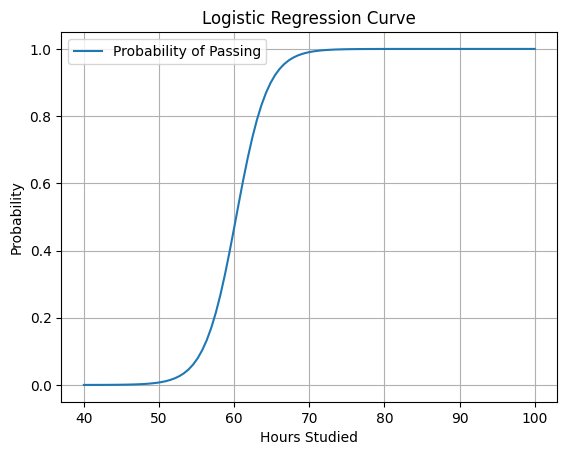

In [9]:
import matplotlib.pyplot as plt

# Plot the logistic curve
x_values = np.linspace(40, 100, 100).reshape(-1, 1)
y_prob = model.predict_proba(pd.DataFrame(x_values, columns=["Hours Studied"]))[:, 1]

plt.plot(x_values, y_prob, label="Probability of Passing")
plt.xlabel("Hours Studied")
plt.ylabel("Probability")
plt.title("Logistic Regression Curve")
plt.grid(True)
plt.legend()
plt.show()



### 📈 Logistic Regression Curve Interpretation

- This curve illustrates the **probability of a student passing** based on total hours studied.
- As the hours studied increases, the **predicted probability of passing also increases**—which aligns with expectations.
- The curve has a steep transition between **60 and 70**, indicating that this is the region where the model is **most uncertain** about pass/fail classification.
- Beyond hours of **70**, the probability of passing approaches **1 (100%)**, and below **60**, it approaches **0 (0%)**.
- This S-shaped curve is a characteristic output of **logistic regression**, modeling binary outcomes (pass/fail) based on a continuous feature (hours studied).

✅ The model is able to clearly separate likely passers from likely non-passers based on hours studied.
